<a href="https://colab.research.google.com/github/julianafalves/Sinais-Digitais/blob/main/Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1o Trabalho de PSD (notebook para preencher com os resultados)

### Número do Grupo : `inserir o número do grupo aqui`

In [ ]:
!pip install scikit_dsp_comm

     |████████████████████████████████| 90 kB 5.1 MB/s 


In [49]:
import sk_dsp_comm.sigsys as ssd
import numpy as np
from matplotlib import pylab
from pylab import *
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

In [ ]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

# Problema 1
 Usando a função stem() em Python calcule e plote as seguintes funções
$$
\begin{align}
    x_1[n] &= \sin\big(\frac{\pi}{5}n\big),\ 0\leq n \leq 15 \\
    x_2[n] &= \cos\big(\frac{3\pi}{5}n\big),\ 0\leq n \leq 15 \\
    x_3[n] &= \sin\big(\frac{\pi}{4}n\big)\cos\big(\frac{\pi}{4}n\big),\ 0\leq n \leq 32
\end{align}
$$
Qual é o período da fundamental de cada sinail?

In [34]:
pi = np.pi

## Parte a - sinal $x_1[n]$
O período da fundamental, $N$, é 10

`adicione o resultado aqui e explicação de como ele foi determinado`

In [ ]:
def x1(n):
   return np.sin((np.pi/5)*n)
   
n = np.arange(0, 16, dtype= 'int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


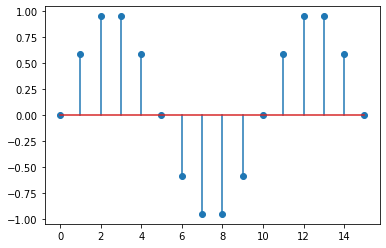

In [ ]:
stem(n,x1(n))
show()

In [32]:
def fundamentalFunc(omega): #pi/5 /pi
  numerador = 2 * np.pi
  if omega % np.pi == 0 or np.pi % (np.pi/5) == 0:
    k = 1
    while True:
      N = (numerador * k / omega)
      k += 1
      if N.is_integer():
        return N
  return None
    

In [33]:
periodo = fundamentalFunc(np.pi/5)
print(periodo)

10.0


## Parte b - sinal $x_2[n]$
O período da fundamental, $N$, é

`adicione o resultado aqui e explicação de como ele foi determinado`

In [ ]:
# escreva o seu código aqui

## Parte c - sinal $x_3[n]$
Para encontrar o período, primeiro expanda o produto usando uma relação trigonomêtrica apropriada:
$$
    x_3[n] = \frac{1}{2}\left[\sin(0\cdot n) + \sin\big(\frac{\pi}{2}n\big)\right], 0\leq n\leq 32
$$
Você deve escolher $N$ tal que $\ldots$

`adicione o resultado aqui e explicação de como ele foi determinado`


In [46]:
def x3(n):
  return (1/2)*np.sin((n*pi)/2)
n3 = np.arange(0,33,dtype='int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

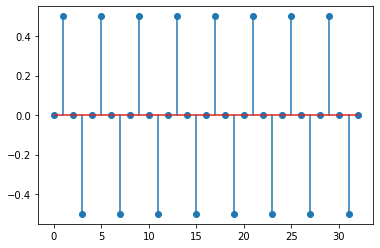

In [47]:
stem(n3,x3(n3))
show

In [43]:
print("Período fundamental: ",fundamentalFunc(pi/2))

Período fundamental:  4.0


# Problema 2
Usando a função `stem()` calcule e plote a o sinal
$$
x[n] = \begin{cases}
        2n+1, & -3\leq n\leq 3 \\
        0, & \text{otherwise}
        \end{cases}
$$
no intervalo $-8\leq n\leq 8$. 

OBS: Criar a função $x[n]$ sem o uso de loop!! Observe ainda que o módulo python “sk_dsp_comm.sigsys” possui a função drect() que serve para criar uma função janela - estude o exemplo python ex2.py fornecido na aba “Material para realização dos projetos”. 

In [55]:
n = np.arange(-8,9)
x = (2*n + 1) * ssd.drect(n+3, N=7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<function matplotlib.pyplot.show>

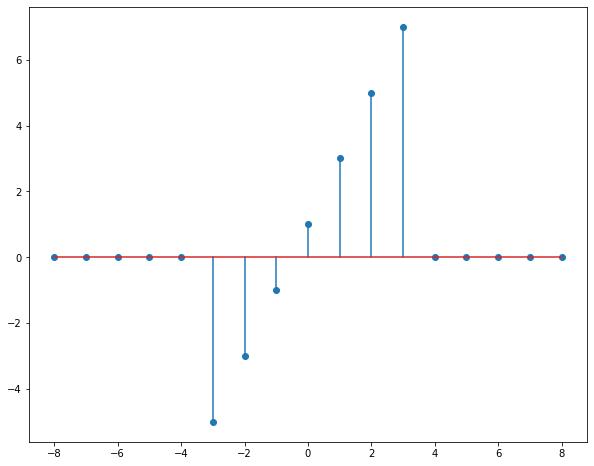

In [56]:
figure(figsize=(10,8))
stem(n,x)
show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the

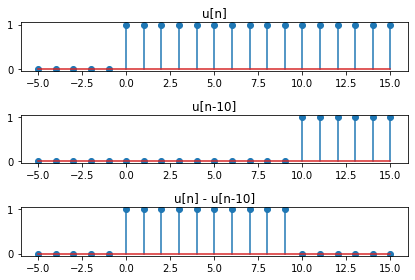

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import sk_dsp_comm.sigsys as ssd                         

# create time axis n:  -5 <= n <= 15
n = np.arange(-5,15+1) 

# Create two subplots and unpack the output array immediately
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True)

# plot u[n]
ax1.stem( n, ssd.dstep(n) )
ax1.set_title('u[n]')

# plot u[n-10]
ax2.stem( n, ssd.dstep(n-10) )
ax2.set_title('u[n-10]')

# difference
ax3.stem( n, ssd.dstep(n) - ssd.dstep(n-10) )
ax3.set_title('u[n] - u[n-10]')

fig.tight_layout() 
plt.show()

# Problema 3
Usando a função `stem()` calcule e plote o sinal
$$
    x[n] = u[n]u[8-n] + u[n-2]-u[n-5]
$$
no intervalo $-2\leq n\leq 16$.  Observe que o módulo  `sigsys`  (aliased  como  `ss`)  possui a função `dstep()` definida, a qual pode tornar esse problema bastante simples.

OBS: Estude os exemplos ex1.py e ex2.py fornecidos na aba “Material para realização dos projetos”.

In [59]:
n = np.arange(-2,16+1)
x = ssd.dstep(n)*ssd.dstep(8-n)+ssd.dstep(n-2)-ssd.dstep(n-5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the 

Text(0.5, 1.0, 'u[n]*u[8-n]')

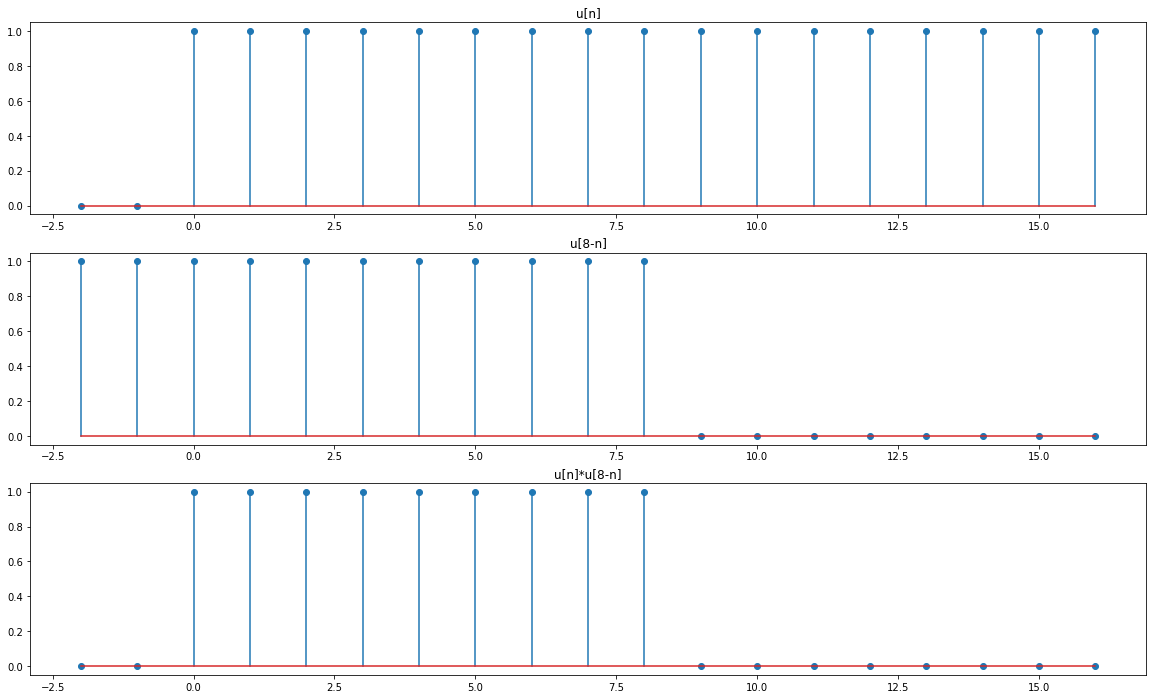

In [75]:
fig, axs = plt.subplots(3, 1, sharey=True,figsize=(20,12))


axs[0].stem(n, ssd.dstep(n))
axs[0].set_title('u[n]')

axs[1].stem(n, ssd.dstep(8-n))
axs[1].set_title('u[8-n]')

axs[2].stem(n, ssd.dstep(n)*ssd.dstep(8-n))
axs[2].set_title('u[n]*u[8-n]')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this wa

Text(0.5, 1.0, 'u[n]*u[8-n]+u[n-2]-u[n-5]')

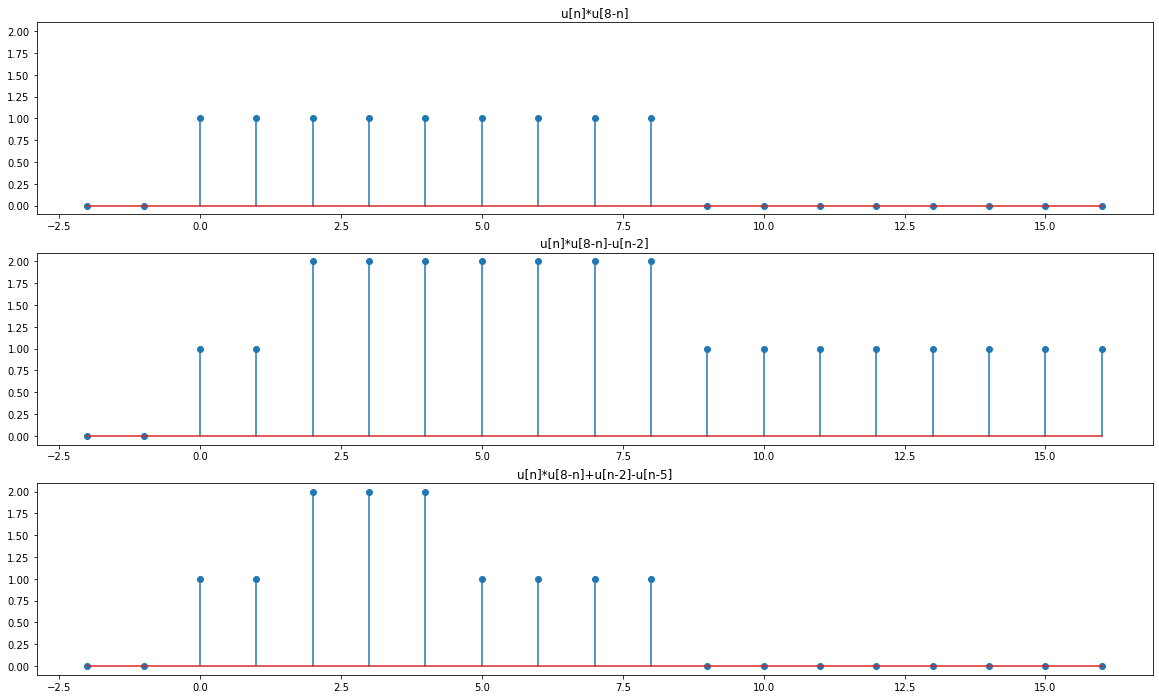

In [76]:
fig, axs = plt.subplots(3, 1, sharey=True, figsize=(20,12))
axs[0].stem(n, ssd.dstep(n)*ssd.dstep(8-n))
axs[0].set_title('u[n]*u[8-n]')

axs[1].stem(n, ssd.dstep(n)*ssd.dstep(8-n)+ssd.dstep(n-2))
axs[1].set_title('u[n]*u[8-n]-u[n-2]')

axs[2].stem(n, ssd.dstep(n)*ssd.dstep(8-n)+ssd.dstep(n-2)-ssd.dstep(n-5))
axs[2].set_title('u[n]*u[8-n]+u[n-2]-u[n-5]')

# Problema 4
Considere o sinal
$$
    y[n] = \begin{cases}
        2, & n=0 \\
        1, & n=1 \\
        -1, & n=3 \\
        3, & n=4 \\
        0, & \text{caso contrário}
    \end{cases}
$$

Escreva uma função python ($y[n]$) como indicado abaixo para que você possa responder as questões que seguem.

In [85]:
def y(n):
    """
    Use a função dimpulse do módulo sigsys para diretamente definir 
    o sinal y[n]
    """
    yy = 2*ssd.dimpulse(n) + 1*ssd.dimpulse(n-1) - ssd.dimpulse(n-3) + 3*ssd.dimpulse(n-4)
    return yy

In [91]:
n = np.arange(-4,10)

## Parte a
Usando a função `stem()` plote $z_1[n] = y[n-2]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


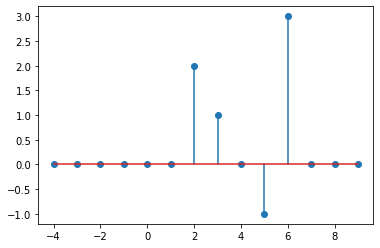

In [92]:
stem(n,y(n-2))
show()

## Parte b
Usando a função `stem()` plote $z_2[n] = y[n+2]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


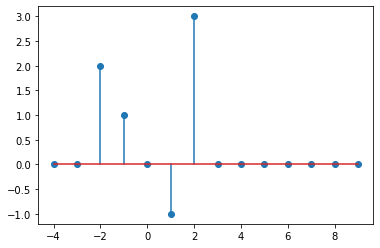

In [93]:
stem(n,y(n+2))
show()

## Parte c
Usando a função `stem()` plote $z_3[n] = y[-n]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


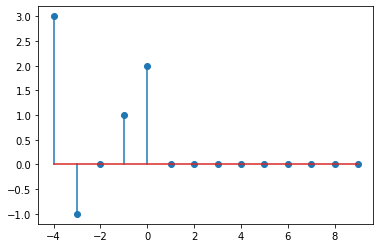

In [94]:
stem(n,y(-n))
show()

# Problema 5
Dado os sinais abaixo:
$$
\begin{align}
    x_1[n] &= \{1,2,-3,2,1,1\} \;\;\;\; h_1[n] = \{1,2,-3\}\\
    x_2[n] &= \{0,0,0,0,1,1,1,1,0,0,0,0,-1,-1,-1,-1,0,0,0,0\}$  \;\;\;\;  h_{2}[n]=\{1,4,10,16,19,16,10,4,1\}
\end{align}
$$

## Parte a
Escrever uma função na linguagem python (__"sem usar funções prontas de qualquer biblioteca"__) para fazer a __convolução__ entre dois sinais unidimensionais (1D). 

In [106]:
def cov(x,h):
  tam = len(h1) - 1
  x = tam*[0] + x + tam*[0] #completa com 0
  h = h[::-1] + (len(x)-len(h))*[0] # flip e completa com 0
  y = []

  for i in range(len(h)):
    y.append(sum([a * b for a, b in zip(x, h)]))
    h = h[-1:] + h[:-1]
  return y


## Parte b
Faça a convolução entre os sinais $x_1*h_1$ e $x_2*h_2$ e plote usando a função stem os sinais originais e os resultados das convoluções.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show>

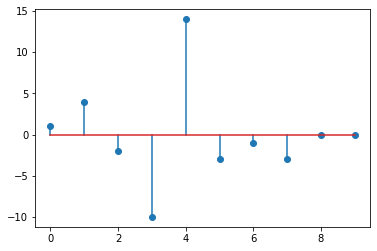

In [107]:
h1= [ 1,2,-3]
x1 = [1,2,-3,2,1,1]
stem(np.arange(0,len(cov(x1,h1))),cov(x1,h1))
show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

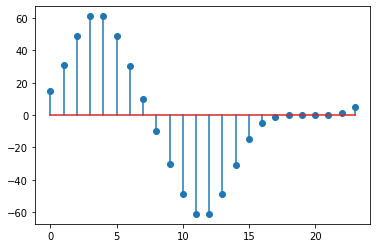

In [109]:
x2 = [0,0,0,0,1,1,1,1,0,0,0,0,-1,-1,-1,-1,0,0,0,0]
h2 = [1,4,10,16,19,16,10,4,1]
stem(np.arange(0,len(cov(x2,h2))),cov(x2,h2))
show

## Parte c
De maneira similar à "Parte b" do exercício, usando __o mesmo código da função convolução__, faça a __correlação__ entre os sinais e plote os resultados.

Dica, lembre-se que:

Convolução: $ y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$

Correlação: $ y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n+k]$

In [111]:
def corr(x,h):
  tam = len(h1) - 1
  x = tam*[0] + x + tam*[0] #completa com 0
  h = h + (len(x)-len(h))*[0] # flip e completa com 0
  y = []

  for i in range(len(h)):
    y.append(sum([a * b for a, b in zip(x, h)]))
    h = h[-1:] + h[:-1]
  return y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

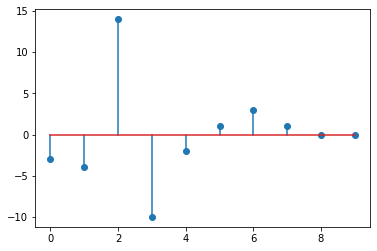

In [112]:
h1= [ 1,2,-3]
x1 = [1,2,-3,2,1,1]
stem(np.arange(0,len(corr(x1,h1))),corr(x1,h1))
show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

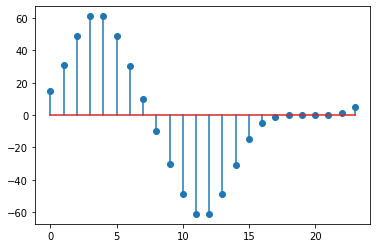

In [113]:
x2 = [0,0,0,0,1,1,1,1,0,0,0,0,-1,-1,-1,-1,0,0,0,0]
h2 = [1,4,10,16,19,16,10,4,1]
stem(np.arange(0,len(corr(x2,h2))),corr(x2,h2))
show

## Parte d
Utilize agora a função da biblioteca numpy (numpy.convolve) para realizar as mesmas convoluções da "Parte a". Use a função numpy.convolve - mode{‘full’} e discuta os resultados.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


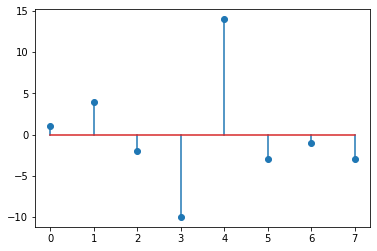

In [116]:
h1= [ 1,2,-3]
x1 = [1,2,-3,2,1,1]
stem(np.arange(0,len(np.convolve(x1,h1))),np.convolve(x1,h1))
show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

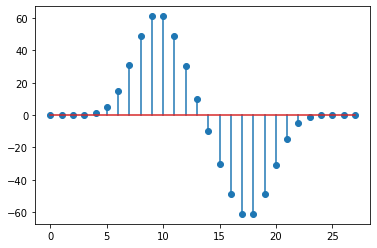

In [117]:
x2 = [0,0,0,0,1,1,1,1,0,0,0,0,-1,-1,-1,-1,0,0,0,0]
h2 = [1,4,10,16,19,16,10,4,1]
stem(np.arange(0,len(np.convolve(x2,h2))),np.convolve(x2,h2))
show